In [1]:
import numpy as np
import pandas as pd
import pickle
import torch.nn as nn
from torch.utils.data import DataLoader
import json, ast, sys, csv, random
import plotly.express as px
import math
import datetime
import sys
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


#Implement training process
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, mean_absolute_error
csv.field_size_limit(sys.maxsize)
URL = "/media/data/ccarmona/memoria/dataset/rl_csvs/"

In [2]:
model_name = 'Model_Adam_0.000015'

In [3]:
def open_files_final(model_name, lr):
    nombre_compuesto = model_name + str(lr)
    #neo_df_final = pd.read_csv(URL + "neo_df_final"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    ql_df_final = pd.read_csv(URL + "ql_df_final"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    sarsa_df_final = pd.read_csv(URL + "sarsa_df_final"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    exsarsa_df_final = pd.read_csv(URL + "exsarsa_df_final"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    return [ql_df_final, sarsa_df_final, exsarsa_df_final]
def open_files_iter(model_name, lr):
    nombre_compuesto = model_name + str(lr)
    #neo_df_iter = pd.read_csv(URL + "neo_df_no_history" + nombre_compuesto +".csv", engine='python', encoding='utf-8')
    ql_df_iter = pd.read_csv(URL + "ql_df_no_history"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    sarsa_df_iter = pd.read_csv(URL + "sarsa_df_no_history"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    exsarsa_df_iter = pd.read_csv(URL + "exsarsa_df_no_history"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    return [ql_df_iter, sarsa_df_iter, exsarsa_df_iter]

In [4]:
### lr 0.9 ###
model_0_9_final = open_files_final(model_name,0.9)
model_0_9_iter = open_files_iter(model_name,0.9)

### lr 0.09 ###
model_0_09_final = open_files_final(model_name,0.09)
model_0_09_iter = open_files_iter(model_name,0.09)

### lr 0.009 ###
model_0_009_final = open_files_final(model_name,0.009)
model_0_009_iter = open_files_iter(model_name,0.009)

### lr 0.999 ###
model_0_999_final = open_files_final(model_name,0.999)
model_0_999_iter = open_files_iter(model_name,0.999)

In [5]:
matplotlib.rc('text', usetex = False)

### Latencia promedio de cada algoritmo + promedio real por  lr

In [11]:
def Valores_Promedio(df):
    real_value = [np.mean(df[0]['real_new']) for i in range(3)]
    old_pred = [np.mean(df[0]['pred_old']) for i in range(3)]
    h = [
        #np.mean(df[0]['pred_new']), # NEO
        np.mean(df[0]['pred_new']), # QL
        np.mean(df[1]['pred_new']), # SARSA
        np.mean(df[2]['pred_new']), # EXSARSA
    ]
    return h, real_value, old_pred
def autolabel(rects, ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.75*height,
                str(round(float(height),3)),
                ha='center', va='bottom')

Text(0, 0.5, 'Promedio de la latencia')

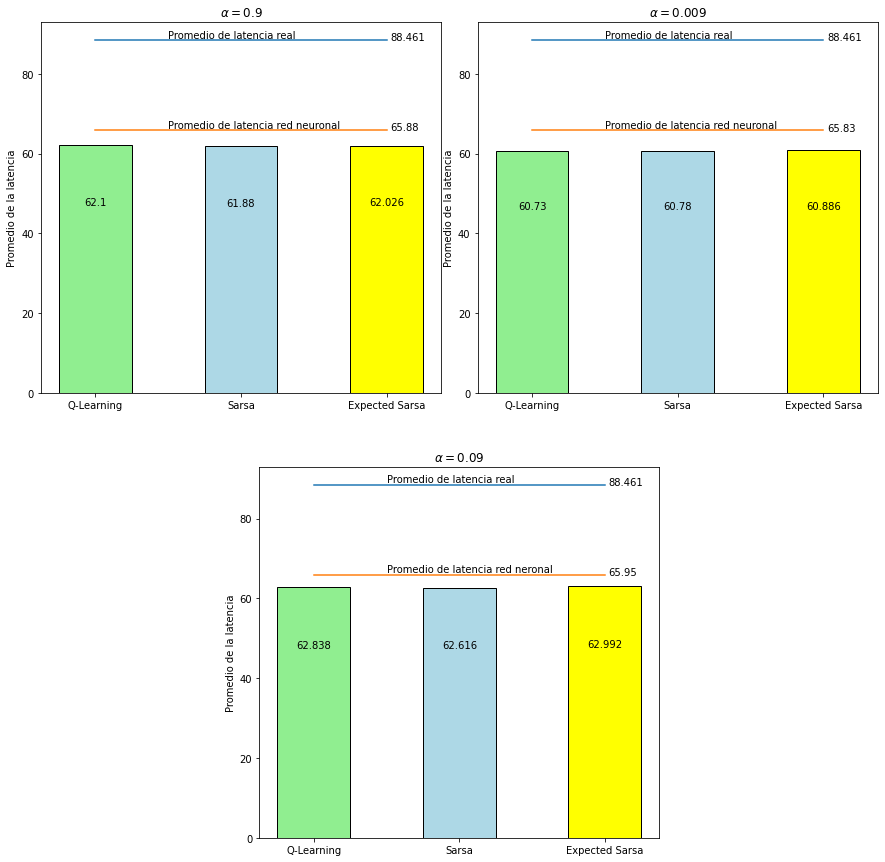

In [34]:
fig = plt.figure(figsize=(15,15))
ind = np.arange(3)*0.4
c = ['lightgreen','lightblue','yellow','orange']
names = ('Q-Learning','Sarsa','Expected Sarsa')
width = 0.2

ax = plt.subplot2grid((2,4),(0,0), colspan=2)

h1, real_value1, old_pred1  = Valores_Promedio(model_0_9_final)
rects1 = ax.bar(ind, h1, width, color=c, edgecolor = 'black')
line11 = ax.plot(ind, real_value1);
line22 = ax.plot(ind, old_pred1);
ax.text(ind[0]+0.20,real_value1[0] + 0.55,'Promedio de latencia real')
ax.text(ind[0]+0.20,old_pred1[0] + 0.55,'Promedio de latencia red neuronal')
ax.text(ind[2]+0.01,real_value1[0] - 0.1,str(round(real_value1[0],3)))
ax.text(ind[2]+0.01,old_pred1[0] - 0.1,str(round(old_pred1[0],2)))
ax.set_xticks(ind)
ax.set_xticklabels(names)
autolabel(rects1,ax)
ax.title.set_text(r'$\alpha=0.9$')
ax.set_ylabel('Promedio de la latencia')


ax1 = plt.subplot2grid((2,4),(0,2), colspan=2)
h2, real_value2, old_pred2  = Valores_Promedio(model_0_09_final)
rects2 = ax1.bar(ind, h2, width, color=c, edgecolor = 'black')
line12 = ax1.plot(ind, real_value2);
line22 = ax1.plot(ind, old_pred2);
ax1.text(ind[0]+0.20,real_value2[0] + 0.55,'Promedio de latencia real')
ax1.text(ind[0]+0.20,old_pred2[0] + 0.55,'Promedio de latencia red neuronal')
ax1.text(ind[2]+0.01,real_value2[0] - 0.1,str(round(real_value2[0],3)))
ax1.text(ind[2]+0.01,old_pred2[0] - 0.1,str(round(old_pred2[0],2)))
ax1.set_xticks(ind)
ax1.set_xticklabels(names)
autolabel(rects2,ax1)
ax1.title.set_text(r'$\alpha=0.009$')
ax1.set_ylabel('Promedio de la latencia')

ax2 = plt.subplot2grid((2,4),(1,1), colspan=2)
h3, real_value3, old_pred3  = Valores_Promedio(model_0_009_final)
rects3 = ax2.bar(ind, h3, width, color=c, edgecolor = 'black')
line13 = ax2.plot(ind, real_value3);
line23 = ax2.plot(ind, old_pred3);
ax2.text(ind[0]+0.20,real_value3[0] + 0.55,'Promedio de latencia real')
ax2.text(ind[0]+0.20,old_pred3[0] + 0.55,'Promedio de latencia red neronal')
ax2.text(ind[2]+0.01,real_value3[0] - 0.1,str(round(real_value3[0],3)))
ax2.text(ind[2]+0.01,old_pred3[0] - 0.1,str(round(old_pred3[0],2)))
ax2.set_xticks(ind)
ax2.set_xticklabels(names)
autolabel(rects3,ax2)
ax2.title.set_text(r'$\alpha=0.09$')
ax2.set_ylabel('Promedio de la latencia')

In [110]:
np.arange(-1,2)*width

array([-0.2,  0. ,  0.2])

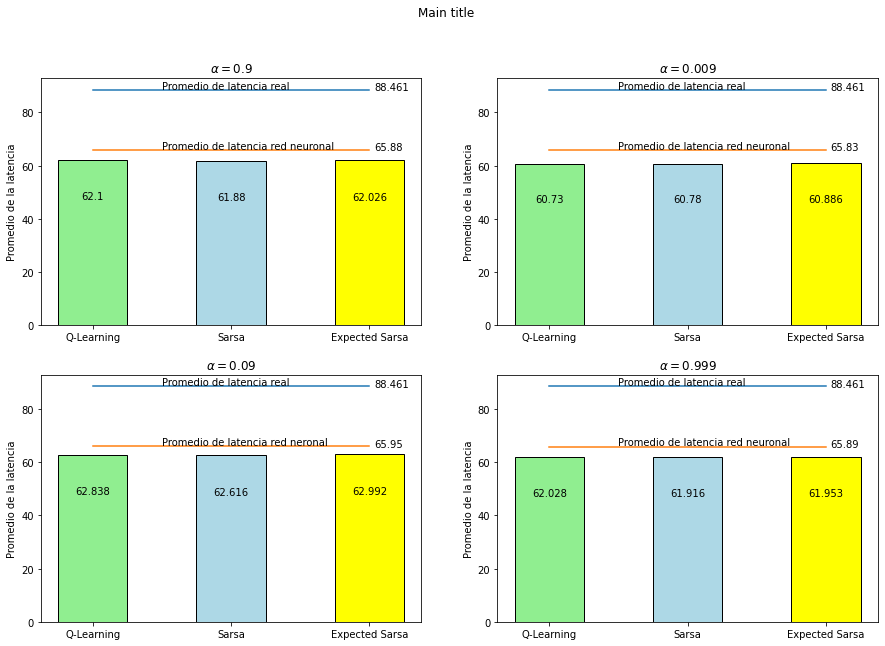

In [120]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
width = 0.15
ind = np.arange(3)*width*2
c = ['lightgreen','lightblue','yellow','orange']
names = ('Q-Learning','Sarsa','Expected Sarsa')


h1, real_value1, old_pred1  = Valores_Promedio(model_0_9_final)
rects1 = ax1.bar(ind, h1, width, color=c, edgecolor = 'black',align='center')
line11 = ax1.plot(ind, real_value1);
line22 = ax1.plot(ind, old_pred1);
ax1.text(ind[0]+width,real_value1[0] + 0.55,'Promedio de latencia real')
ax1.text(ind[0]+width,old_pred1[0] + 0.55,'Promedio de latencia red neuronal')
ax1.text(ind[2]+0.01,real_value1[0] - 0.1,str(round(real_value1[0],3)))
ax1.text(ind[2]+0.01,old_pred1[0] - 0.1,str(round(old_pred1[0],2)))
ax1.set_xticks(ind)
ax1.set_xticklabels(names)
autolabel(rects1,ax1)
ax1.title.set_text(r'$\alpha=0.9$')
ax1.set_ylabel('Promedio de la latencia')

h2, real_value2, old_pred2  = Valores_Promedio(model_0_09_final)
rects2 = ax2.bar(ind, h2, width, color=c, edgecolor = 'black',align='center')
line12 = ax2.plot(ind, real_value2);
line22 = ax2.plot(ind, old_pred2);
ax2.text(ind[0]+width,real_value2[0] + 0.55,'Promedio de latencia real')
ax2.text(ind[0]+width,old_pred2[0] + 0.55,'Promedio de latencia red neuronal')
ax2.text(ind[2]+0.01,real_value2[0] - 0.1,str(round(real_value2[0],3)))
ax2.text(ind[2]+0.01,old_pred2[0] - 0.1,str(round(old_pred2[0],2)))
ax2.set_xticks(ind)
ax2.set_xticklabels(names)
autolabel(rects2,ax2)
ax2.title.set_text(r'$\alpha=0.009$')
ax2.set_ylabel('Promedio de la latencia')

h3, real_value3, old_pred3  = Valores_Promedio(model_0_009_final)
rects3 = ax3.bar(ind, h3, width, color=c, edgecolor = 'black',align='center')
line13 = ax3.plot(ind, real_value3);
line23 = ax3.plot(ind, old_pred3);
ax3.text(ind[0]+width,real_value3[0] + 0.55,'Promedio de latencia real')
ax3.text(ind[0]+width,old_pred3[0] + 0.55,'Promedio de latencia red neronal')
ax3.text(ind[2]+0.01,real_value3[0] - 0.1,str(round(real_value3[0],3)))
ax3.text(ind[2]+0.01,old_pred3[0] - 0.1,str(round(old_pred3[0],2)))
ax3.set_xticks(ind)
ax3.set_xticklabels(names)
autolabel(rects3,ax3)
ax3.title.set_text(r'$\alpha=0.09$')
ax3.set_ylabel('Promedio de la latencia')

h4, real_value4, old_pred4  = Valores_Promedio(model_0_999_final)
rects4 = ax4.bar(ind, h4, width, color=c, edgecolor = 'black',align='center')
line14 = ax4.plot(ind, real_value4);
line24 = ax4.plot(ind, old_pred4);
ax4.text(ind[0]+width,real_value4[0] + 0.55,'Promedio de latencia real')
ax4.text(ind[0]+width,old_pred4[0] + 0.55,'Promedio de latencia red neuronal')
ax4.text(ind[2]+0.01,real_value4[0] - 0.1,str(round(real_value4[0],3)))
ax4.text(ind[2]+0.01,old_pred4[0] - 0.1,str(round(old_pred4[0],2)))
ax4.set_xticks(ind)
ax4.set_xticklabels(names)
autolabel(rects4,ax4)
ax4.title.set_text(r'$\alpha=0.999$')
ax4.set_ylabel('Promedio de la latencia')


plt.suptitle('Main title')
plt.show()

### Latencia promedio por iteración de  cada consulta para cada algoritmo + promedio real

In [35]:
def PromedioPorIteracionFormato(df, num_iter):
    aux_dict = {}
    values_pred = []
    for i in range(num_iter):
        aux_dict[str(i)] = {"index" : 0, "preds" : [], "mean_preds" : []}
    for i in range(len(df)):
        a = [df['index'][i],df['iteration'][i],df['pred_new'][i]]
        aux_dict[str(a[1])]["index"] = a[0]
        aux_dict[str(a[1])]["preds"].append(float(a[2]))
    for k,v in aux_dict.items():
        aux_dict[k]["mean_preds"] = np.mean(aux_dict[k]["preds"])
        values_pred.append(np.mean(aux_dict[k]["preds"]))
    index_list = [int(x) for x in list(aux_dict.keys())]
    return index_list, values_pred
def PromedioPorIteracion(df):
    index_list, values_pred = PromedioPorIteracionFormato(df)
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(index_list, values_pred);

In [37]:
#index_list_neo_0_9, values_pred_neo_0_9 = PromedioPorIteracionFormato(model_0_9_iter[0],200)
index_list_ql_0_9, values_pred_ql_0_9 = PromedioPorIteracionFormato(model_0_9_iter[0],200)
index_list_sarsa_0_9, values_pred_sarsa_0_9 = PromedioPorIteracionFormato(model_0_9_iter[1],200)
index_list_exsarsa_0_9, values_pred_exsarsa_0_9 = PromedioPorIteracionFormato(model_0_9_iter[2],200)

#index_list_neo_0_09, values_pred_neo_0_09 = PromedioPorIteracionFormato(model_0_09_iter[0],200)
index_list_ql_0_09, values_pred_ql_0_09 = PromedioPorIteracionFormato(model_0_09_iter[0],200)
index_list_sarsa_0_09, values_pred_sarsa_0_09 = PromedioPorIteracionFormato(model_0_09_iter[1],200)
index_list_exsarsa_0_09, values_pred_exsarsa_0_09 = PromedioPorIteracionFormato(model_0_09_iter[2],200)

#index_list_neo_0_009, values_pred_neo_0_009 = PromedioPorIteracionFormato(model_0_009_iter[0],200)
index_list_ql_0_009, values_pred_ql_0_009 = PromedioPorIteracionFormato(model_0_009_iter[0],200)
index_list_sarsa_0_009, values_pred_sarsa_0_009 = PromedioPorIteracionFormato(model_0_009_iter[1],200)
index_list_exsarsa_0_009, values_pred_exsarsa_0_009 = PromedioPorIteracionFormato(model_0_009_iter[2],200)

#index_list_neo_0_999, values_pred_neo_0_999 = PromedioPorIteracionFormato(model_0_999_iter[0],200)
index_list_ql_0_999, values_pred_ql_0_999 = PromedioPorIteracionFormato(model_0_999_iter[0],200)
index_list_sarsa_0_999, values_pred_sarsa_0_999 = PromedioPorIteracionFormato(model_0_999_iter[1],200)
index_list_exsarsa_0_999, values_pred_exsarsa_0_999 = PromedioPorIteracionFormato(model_0_999_iter[2],200)

In [ ]:
real_value = np.ones(len(index_list_ql_0_999))*np.mean(model_0_9_iter[0]['real_new'])
old_predict = np.ones(len(index_list_ql_0_999))*np.mean(model_0_9_iter[0]['pred_old'])

In [ ]:
np.mean(model_0_9_iter[0]['pred_old'])

[Text(0.5, 0, 'Iteraciones'), Text(0, 0.5, 'Latencia promedio')]

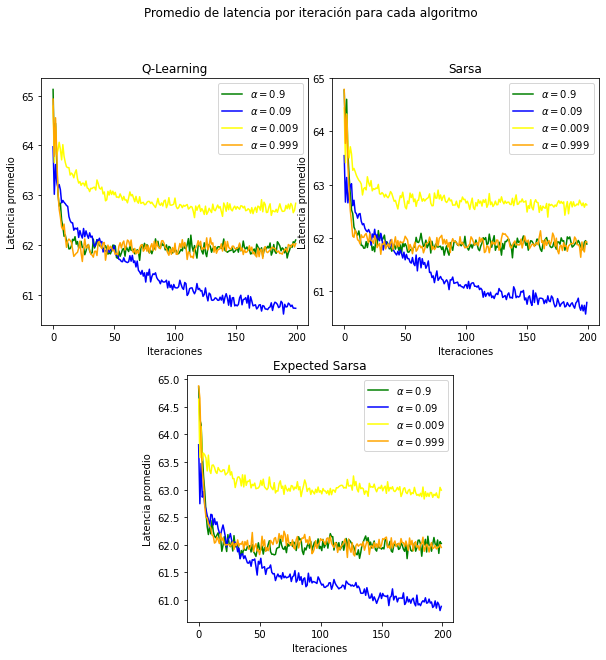

In [125]:
fig = plt.figure(figsize=(10,10))
ind = np.arange(3)*0.4
fig.suptitle('Promedio de latencia por iteración para cada algoritmo')
c = ['green','blue','yellow','orange','grey','black']
names = ('Q-Learning','Sarsa','Expected Sarsa')
width = 0.2

ax1 = plt.subplot2grid((2,4),(0,0), colspan=2)
ax1.set_title('Q-Learning')
ax1.plot(index_list_ql_0_9, values_pred_ql_0_9, color=c[0], label = r'$\alpha=0.9$')
ax1.plot(index_list_ql_0_09, values_pred_ql_0_09, color=c[1], label = r'$\alpha=0.09$')
ax1.plot(index_list_ql_0_009, values_pred_ql_0_009, color=c[2], label = r'$\alpha=0.009$')
ax1.plot(index_list_ql_0_999, values_pred_ql_0_999, color=c[3], label = r'$\alpha=0.999$')
ax1.legend()
#ax2.plot(index_list_ql, real_value, color=c[5], linestyle='dashed')
#ax2.plot(index_list_ql, old_predict, color=c[4], linestyle='dashed')

ax2 = plt.subplot2grid((2,4),(0,2), colspan=2)
ax2.set_title('Sarsa')
ax2.plot(index_list_sarsa_0_9, values_pred_sarsa_0_9, color=c[0], label = r'$\alpha=0.9$')
ax2.plot(index_list_sarsa_0_09, values_pred_sarsa_0_09, color=c[1], label = r'$\alpha=0.09$')
ax2.plot(index_list_sarsa_0_009, values_pred_sarsa_0_009, color=c[2], label = r'$\alpha=0.009$')
ax2.plot(index_list_sarsa_0_999, values_pred_sarsa_0_999, color=c[3], label = r'$\alpha=0.999$')
ax2.legend()



ax3 = plt.subplot2grid((2,4),(1,1), colspan=2)
ax3.set_title('Expected Sarsa')
ax3.plot(index_list_exsarsa_0_9, values_pred_exsarsa_0_9, color=c[0], label = r'$\alpha=0.9$')
ax3.plot(index_list_exsarsa_0_09, values_pred_exsarsa_0_09, color=c[1], label = r'$\alpha=0.09$')
ax3.plot(index_list_exsarsa_0_009, values_pred_exsarsa_0_009, color=c[2], label = r'$\alpha=0.009$')
ax3.plot(index_list_exsarsa_0_999, values_pred_exsarsa_0_999, color=c[3], label = r'$\alpha=0.999$')
ax3.legend()

plt.setp(ax1, xlabel='Iteraciones', ylabel='Latencia promedio')
plt.setp(ax2, xlabel='Iteraciones', ylabel='Latencia promedio')
plt.setp(ax3, xlabel='Iteraciones', ylabel='Latencia promedio')

[Text(0.5, 0, 'Iteraciones'), Text(0, 0.5, 'Latencia promedio')]

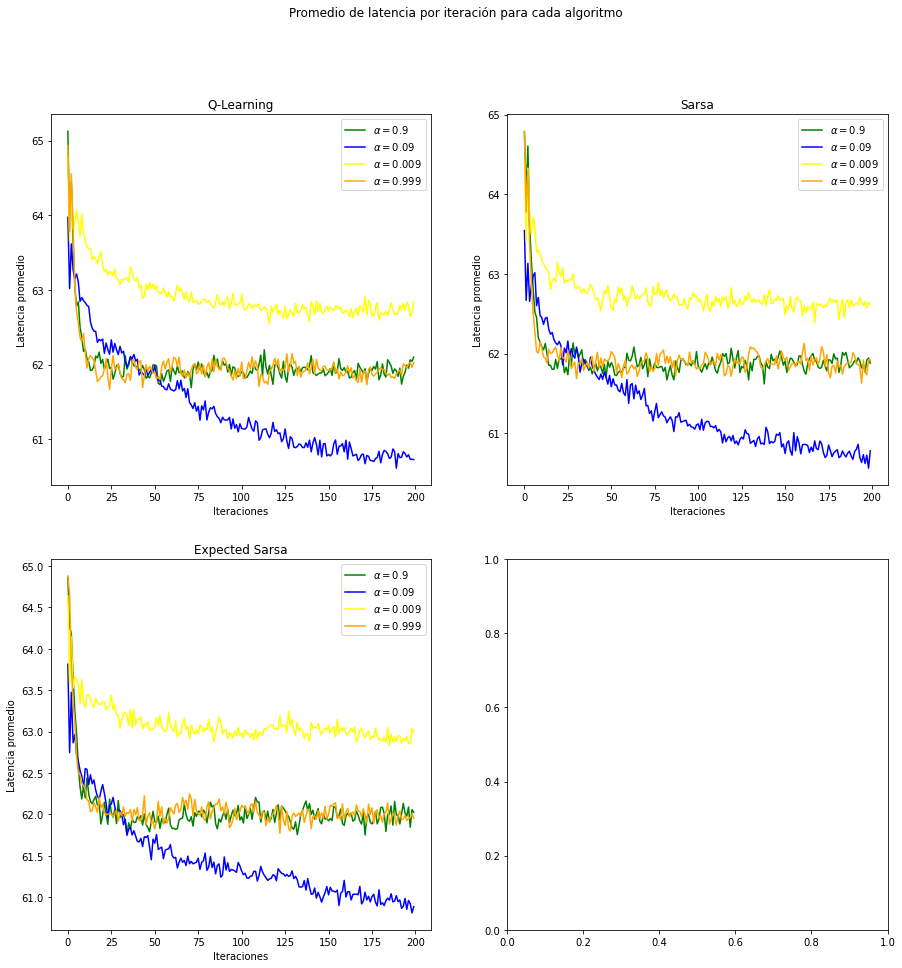

In [121]:
import matplotlib.pyplot as plt
import numpy as np

# Some example data to display

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('Promedio de latencia por iteración para cada algoritmo')
c = ['green','blue','yellow','orange','grey','black']
#ax1.set_title('Neo')
#ax1.plot(index_list_neo_0_9, values_pred_neo_0_9, color=c[0], label = r'$\alpha=0.9$')
#ax1.plot(index_list_neo_0_09, values_pred_neo_0_09, color=c[1], label = r'$\alpha=0.09$')
#ax1.plot(index_list_neo_0_009, values_pred_neo_0_009, color=c[2], label = r'$\alpha=0.009$')
#ax1.plot(index_list_neo_0_999, values_pred_neo_0_999, color=c[3], label = r'$\alpha=0.999$')
#ax1.legend()
#ax1.plot(index_list_neo, real_value, color=c[5], linestyle='dashed')
#ax1.plot(index_list_neo, old_predict, color=c[4], linestyle='dashed')

ax1.set_title('Q-Learning')
ax1.plot(index_list_ql_0_9, values_pred_ql_0_9, color=c[0], label = r'$\alpha=0.9$')
ax1.plot(index_list_ql_0_09, values_pred_ql_0_09, color=c[1], label = r'$\alpha=0.09$')
ax1.plot(index_list_ql_0_009, values_pred_ql_0_009, color=c[2], label = r'$\alpha=0.009$')
ax1.plot(index_list_ql_0_999, values_pred_ql_0_999, color=c[3], label = r'$\alpha=0.999$')
ax1.legend()
#ax2.plot(index_list_ql, real_value, color=c[5], linestyle='dashed')
#ax2.plot(index_list_ql, old_predict, color=c[4], linestyle='dashed')

ax2.set_title('Sarsa')
ax2.plot(index_list_sarsa_0_9, values_pred_sarsa_0_9, color=c[0], label = r'$\alpha=0.9$')
ax2.plot(index_list_sarsa_0_09, values_pred_sarsa_0_09, color=c[1], label = r'$\alpha=0.09$')
ax2.plot(index_list_sarsa_0_009, values_pred_sarsa_0_009, color=c[2], label = r'$\alpha=0.009$')
ax2.plot(index_list_sarsa_0_999, values_pred_sarsa_0_999, color=c[3], label = r'$\alpha=0.999$')
ax2.legend()
#ax3.plot(index_list_sarsa, real_value, color=c[5], linestyle='dashed')
#ax3.plot(index_list_sarsa, old_predict, color=c[4], linestyle='dashed')

ax3.set_title('Expected Sarsa')
ax3.plot(index_list_exsarsa_0_9, values_pred_exsarsa_0_9, color=c[0], label = r'$\alpha=0.9$')
ax3.plot(index_list_exsarsa_0_09, values_pred_exsarsa_0_09, color=c[1], label = r'$\alpha=0.09$')
ax3.plot(index_list_exsarsa_0_009, values_pred_exsarsa_0_009, color=c[2], label = r'$\alpha=0.009$')
ax3.plot(index_list_exsarsa_0_999, values_pred_exsarsa_0_999, color=c[3], label = r'$\alpha=0.999$')
ax3.legend()
#ax4.plot(index_list_exsarsa, real_value, color=c[5], linestyle='dashed')
#ax4.plot(index_list_exsarsa, old_predict, color=c[4], linestyle='dashed')
#for ax in fig.get_axes():
#ax.label_outer()

# set labels

plt.setp(ax1, xlabel='Iteraciones', ylabel='Latencia promedio')
plt.setp(ax2, xlabel='Iteraciones', ylabel='Latencia promedio')
plt.setp(ax3, xlabel='Iteraciones', ylabel='Latencia promedio')


### Consultas mejoradas, consultas iguales, consultas empeoradas

In [ ]:
def tag_best_worst_equal(x, tol):
    if (x['new_tree'] == x['old_tree']):
        x['tag'] = "igual"
    else:
        difference = x['pred_old'] - x['pred_new']
        if difference < -tol:
            x['tag'] = "peor"
        elif difference >= -tol and difference <= tol:
            x['tag'] = "igual"
        else:
            x['tag'] = "mejor"

    return x
def mejor_peor_igual(df):
    try:
        df_mejor = int(df.groupby('tag').count()['index']['mejor'])
    except:
        df_mejor = 0

    try:
        df_peor = int(df.groupby('tag').count()['index']['peor'])
    except:
        df_peor = 0
    try:
        df_igual = int(df.groupby('tag').count()['index']['igual'])
    except:
        df_igual = 0
    return df_mejor, df_peor, df_igual

In [ ]:
def tag_all(df):
    df[0] = df[0].apply(lambda x: tag_best_worst_equal(x,0.01), axis=1)
    df[1] = df[1].apply(lambda x: tag_best_worst_equal(x,0.01), axis=1)
    df[2] = df[2].apply(lambda x: tag_best_worst_equal(x,0.01), axis=1)
    df[3] = df[3].apply(lambda x: tag_best_worst_equal(x,0.01), axis=1)        
    return df
model_0_9_final = tag_all(model_0_9_final)
model_0_09_final = tag_all(model_0_09_final)
model_0_009_final = tag_all(model_0_009_final)
model_0_999_final = tag_all(model_0_999_final)

In [ ]:
print(len(model_0_9_final))
print(len(model_0_09_final))
print(len(model_0_009_final))
print(len(model_0_999_final))

In [ ]:
dict_mejor_peor_igual = {"0.9" : {}, "0.09" : {}, "0.009" : {}, "0.999" : {}}
for i,j in zip(range(0,4),["neo","ql","sarsa","exsarsa"]):
    d1_mejor, d1_peor, d1_igual = mejor_peor_igual(model_0_9_final[i])
    d2_mejor, d2_peor, d2_igual = mejor_peor_igual(model_0_09_final[i])
    d3_mejor, d3_peor, d3_igual = mejor_peor_igual(model_0_009_final[i])
    d4_mejor, d4_peor, d4_igual = mejor_peor_igual(model_0_999_final[i])
    dict_mejor_peor_igual["0.9"][str(j)+"_mejor"] = d1_mejor
    dict_mejor_peor_igual["0.9"][str(j)+"_peor"] = d1_peor
    dict_mejor_peor_igual["0.9"][str(j)+"_igual"] = d1_igual
    dict_mejor_peor_igual["0.09"][str(j)+"_mejor"] = d2_mejor
    dict_mejor_peor_igual["0.09"][str(j)+"_peor"] = d2_peor
    dict_mejor_peor_igual["0.09"][str(j)+"_igual"] = d2_igual
    dict_mejor_peor_igual["0.009"][str(j)+"_mejor"] = d3_mejor
    dict_mejor_peor_igual["0.009"][str(j)+"_peor"] = d3_peor
    dict_mejor_peor_igual["0.009"][str(j)+"_igual"] = d3_igual
    dict_mejor_peor_igual["0.999"][str(j)+"_mejor"] = d4_mejor
    dict_mejor_peor_igual["0.999"][str(j)+"_peor"] = d4_peor
    dict_mejor_peor_igual["0.999"][str(j)+"_igual"] = d4_igual

In [ ]:
dict_mejor_peor_igual["0.9"].keys()

In [ ]:
k = ["0.9","0.09","0.009","0.999"]
n = ["neo","ql","sarsa","exsarsa"]
kk = k[3]
nn = n[2]

print(dict_mejor_peor_igual[kk][str(nn)+"_mejor"] + dict_mejor_peor_igual[kk][str(nn)+"_peor"] + dict_mejor_peor_igual[kk][str(nn)+"_igual"])
print(dict_mejor_peor_igual[kk][str(nn)+"_mejor"],dict_mejor_peor_igual[kk][str(nn)+"_peor"],dict_mejor_peor_igual[kk][str(nn)+"_igual"])

In [ ]:
axis = ((ax1, ax2), (ax3, ax4))
fig, axis = plt.subplots(2, 2, figsize=(15,15))
index = np.arange(4)
bar_width = 0.25
opacity = 0.8


count = 0
lr = ["0.9","0.09","0.009","0.999"]
for axs in axis:
    for ax in axs:
        mejor = (
            dict_mejor_peor_igual[lr[count]]["neo_mejor"], 
            dict_mejor_peor_igual[lr[count]]["ql_mejor"], 
            dict_mejor_peor_igual[lr[count]]["sarsa_mejor"], 
            dict_mejor_peor_igual[lr[count]]["exsarsa_mejor"]
        )
        peor = (
            dict_mejor_peor_igual[lr[count]]["neo_peor"], 
            dict_mejor_peor_igual[lr[count]]["ql_peor"], 
            dict_mejor_peor_igual[lr[count]]["sarsa_peor"], 
            dict_mejor_peor_igual[lr[count]]["exsarsa_peor"]
        )
        igual = (
            dict_mejor_peor_igual[lr[count]]["neo_igual"], 
            dict_mejor_peor_igual[lr[count]]["ql_igual"], 
            dict_mejor_peor_igual[lr[count]]["sarsa_igual"], 
            dict_mejor_peor_igual[lr[count]]["exsarsa_igual"]
        )

        rects1 = ax.bar(index, mejor, bar_width,
        alpha=opacity,
        color='lightgreen',
        label='Mejor',
        edgecolor = 'black')

        rects2 = ax.bar(index + bar_width, igual, bar_width,
        alpha=opacity,
        color='khaki',
        label='igual',
        edgecolor = 'black')

        rects3 = ax.bar(index + 2*bar_width, peor, bar_width,
        alpha=opacity,
        color='darksalmon',
        label='peor',
        edgecolor = 'black')
        
        ax.set_xlabel('Algorítmo')
        ax.set_ylabel('Número de Errores')
        #ax.set_xticks(ind)
        
        ax.set_xticks(index + bar_width)
        ax.set_xticklabels(('Neo', 'Q-Learning', 'Sarsa', 'Expected Sarsa'))
        
        ax.title.set_text(r'$\alpha='+lr[count]+'$')
        
        ax.legend()
        
        for i in index:
            ax.text(index[i], 
                     mejor[i]*0.75,
                     str(mejor[i]),
                     ha='center', va='bottom',
                    )
            ax.text(index[i] + bar_width, 
                     igual[i]*0.75,
                     str(igual[i]),
                     ha='center', va='bottom',
                    )
            ax.text(index[i] + 2*bar_width, 
                     peor[i]*0.75,
                     str(peor[i]),
                     ha='center', va='bottom',
                    )
        
        count += 1



##### Por tipo rango de latencia

In [ ]:
def split_by_latency(df_final):
    df = df_final.copy()
    #df_0_10 = df[df['pred_new'] < 10]
    #df_10_20 = df[(df['pred_new'] >= 10) & (df['pred_new'] < 20)]
    #df_20_30 = df[(df['pred_new'] >= 20) & (df['pred_new'] < 30)]
    #df_30_40 = df[(df['pred_new'] >= 30) & (df['pred_new'] < 40)]
    #df_40_50 = df[(df['pred_new'] >= 40) & (df['pred_new'] < 50)]
    #df_50_60 = df[(df['pred_new'] >= 50) & (df['pred_new'] < 60)]
    #df_60 = df[df['pred_new'] >= 60]
    df_50_60 = df[df['real_old'] < 60]
    df_60_70 = df[(df['real_old'] >= 60) & (df['real_old'] < 70)]
    df_70_80 = df[(df['real_old'] >= 70) & (df['real_old'] < 80)]
    df_80_90 = df[(df['real_old'] >= 80) & (df['real_old'] < 90)]
    df_90_100 = df[(df['real_old'] >= 90) & (df['real_old'] < 100)]
    df_100_110 = df[(df['real_old'] >= 100) & (df['real_old'] < 110)]
    df_110_120 = df[(df['real_old'] >= 110) & (df['real_old'] < 120)]
    df_120_150 = df[df['real_old'] >= 120]
    #df_120_130 = df[(df['real_old'] >= 120) & (df['real_old'] < 130)]
    #df_130_140 = df[(df['real_old'] >= 130) & (df['real_old'] < 140)]
    #df_140_150 = df[df['real_old'] >= 140]
    #return df_0_10, df_10_20 ,df_20_30, df_30_40, df_40_50, df_50_60, df_60
    #return df_50_60,df_60_70,df_70_80,df_80_90,df_90_100,df_100_110,df_110_120,df_120_130,df_130_140,df_140_150
    return df_50_60,df_60_70,df_70_80,df_80_90,df_90_100,df_100_110,df_110_120,df_120_150


In [ ]:
dict_mejor_peor_igual['0.9'].keys()

In [ ]:
len(split_by_latency(model_0_9_final[0]))

In [ ]:
dfs = [model_0_9_final,model_0_09_final,model_0_009_final,model_0_999_final]

In [ ]:
def plot_latency_errors(dfs,idx):
    fig, axis = plt.subplots(2, 2, figsize=(15,15))
    #index = np.arange(4)
    bar_width = 0.30
    opacity = 0.8
    count = 0
    names = {"0" : "Neo", "1" : "Q-Learning", "2" : "Sarsa", "3" : "Expected Sarsa"}
    lr = ["0.9","0.09","0.009","0.999"]
    for axs in axis:
        for ax in axs:
            splitting = split_by_latency(dfs[count][idx]) 
            n_groups = len(splitting)
            index = np.arange(n_groups)
            
            mejor = []
            peor = []
            igual = []
            for df in splitting:
                m, p , i = mejor_peor_igual(df)
                mejor.append(m)
                peor.append(p)
                igual.append(i)
            
    
            rects1 = ax.bar(index, mejor, bar_width,
            alpha=opacity,
            color='lightgreen',
            label='Mejor',
            edgecolor = 'black')

            rects2 = ax.bar(index + bar_width, igual, bar_width,
            alpha=opacity,
            color='khaki',
            label='Igual',
            edgecolor = 'black')

            rects3 = ax.bar(index + 2*bar_width, peor, bar_width,
            alpha=opacity,
            color='darksalmon',
            label='Peor',
            edgecolor = 'black')
            
            ax.set_xlabel('Rangos de Latencia')
            ax.set_ylabel('Número de Errores')
            ##ax.set_xticks(ind)

            #ax.set_xticks(index + bar_width)
            #ax.set_xticklabels(('Neo', 'Q-Learning', 'Sarsa', 'Expected Sarsa'))
            
            #ax.xlabel('Rango de latencia')
            #ax.ylabel('Número de Errores')
            #ax.title(f'Número de errores {nombre_algoritmo} por rangos de latencia')
    
            ax.set_xticks(index + bar_width)
            ax.set_xticklabels(('[50-60)',
                                '[60-70)',
                                '[70-80)',
                                '[80-90)',
                                '[90-100)',
                                '[100-110)',
                                '[110-120)',
                                '[120-150]'),
                              rotation=40)
            ax.legend()
            ax.set_title(r'$\alpha = '+lr[count]+'$')
            
            for i in index:
                ax.text(index[i], 
                         mejor[i]*0.75,
                         str(mejor[i]),
                         ha='center', va='bottom',
                        )
                ax.text(index[i] + 1*bar_width, 
                         igual[i]*0.75,
                         str(igual[i]),
                         ha='center', va='bottom',
                        )
                ax.text(index[i] + 2*bar_width, 
                         peor[i]*0.75,
                         str(peor[i]),
                         ha='center', va='bottom',
                        )
                
            count += 1
    fig.suptitle('Número de errores por rango de latencia para algoritmo '+names[str(idx)]) 
    plt.show()

In [ ]:
plot_latency_errors(dfs,0)
plot_latency_errors(dfs,1)
plot_latency_errors(dfs,2)
plot_latency_errors(dfs,3)

### Latencia promedio de cada consulta diferenciado por numero de JOINs para cada algoritmo

In [ ]:
def split_by_joins(df, val):
    joins_1_p, joins_1_e =[],[]
    joins_2_p, joins_2_e =[],[]
    joins_3_p, joins_3_e =[],[]
    joins_4_p, joins_4_e =[],[]
    joins_5_p, joins_5_e =[],[]
    joins_6_p, joins_6_e =[],[]
    columns = 'tag'
    for i in range(len(df)):
        count_joins = df['new_tree'][i].count('JOIN') 
        if count_joins == 1:
            joins_1_p.append(df[val][i])
            joins_1_e.append(df['tag'][i])
        elif count_joins == 2:
            joins_2_p.append(df[val][i])
            joins_2_e.append(df['tag'][i])       
        elif count_joins == 3:
            joins_3_p.append(df[val][i])
            joins_3_e.append(df['tag'][i])       
        elif count_joins == 4:
            joins_4_p.append(df[val][i])
            joins_4_e.append(df['tag'][i])       
        elif count_joins == 5:
            joins_5_p.append(df[val][i])
            joins_5_e.append(df['tag'][i])       
        else:
            joins_6_p.append(df[val][i])
            joins_6_e.append(df['tag'][i])       
    promedio = [joins_1_p, joins_2_p, joins_3_p, joins_4_p, joins_5_p, joins_6_p]
    errores = [joins_1_e, joins_2_e, joins_3_e, joins_4_e, joins_5_e, joins_6_e]
    return promedio, errores 


In [ ]:
dict_mejor_peor_igual_joins = {"0.9" : {}, "0.09" : {}, "0.009" : {}, "0.999" : {}}
dfs = [model_0_9_final,model_0_09_final,model_0_009_final,model_0_999_final]
names = ["0.9", "0.09", "0.009", "0.999"]
for df in range(len(dfs)):
    original_p_joins, original_e_joins = split_by_joins(dfs[df][0], 'real_old')
    neo_p_joins, neo_e_joins = split_by_joins(dfs[df][0],'pred_new')
    ql_p_joins, ql_e_joins = split_by_joins(dfs[df][1], 'pred_new')
    sarsa_p_joins, sarsa_e_joins = split_by_joins(dfs[df][2], 'pred_new')
    exsarsa_p_joins, exsarsa_e_joins = split_by_joins(dfs[df][3], 'pred_new')

    dict_mejor_peor_igual_joins[names[df]]["original_p_joins"] = original_p_joins
    #dict_mejor_peor_igual_joins[names[df]]["original_e_joins"] = original_e_joins
    
    dict_mejor_peor_igual_joins[names[df]]["neo_p_joins"] = neo_p_joins
    dict_mejor_peor_igual_joins[names[df]]["neo_e_joins"] = neo_e_joins
    
    dict_mejor_peor_igual_joins[names[df]]["ql_p_joins"] = ql_p_joins
    dict_mejor_peor_igual_joins[names[df]]["ql_e_joins"] = ql_e_joins
    
    dict_mejor_peor_igual_joins[names[df]]["sarsa_p_joins"] = sarsa_p_joins
    dict_mejor_peor_igual_joins[names[df]]["sarsa_e_joins"] = sarsa_e_joins
    
    dict_mejor_peor_igual_joins[names[df]]["exsarsa_p_joins"] = exsarsa_p_joins
    dict_mejor_peor_igual_joins[names[df]]["exsarsa_e_joins"] = exsarsa_e_joins



In [ ]:
dict_mejor_peor_igual_joins.keys()

In [ ]:
axis = (ax1, ax2, ax3, ax4)
fig, axis = plt.subplots(4, 1, figsize=(15,20))
index = np.arange(4)
bar_width = 0.15
opacity = 0.8
c = ['blue','lightgreen','lightblue','yellow','orange']
count = 0
lr = ["0.9","0.09","0.009","0.999"]
#for axs in axis:
for ax in axis:
    original_p_joins = dict_mejor_peor_igual_joins[names[df]]["original_p_joins"]
    neo_p_joins = dict_mejor_peor_igual_joins[names[df]]["neo_p_joins"]
    ql_p_joins = dict_mejor_peor_igual_joins[names[df]]["ql_p_joins"]
    sarsa_p_joins = dict_mejor_peor_igual_joins[names[df]]["sarsa_p_joins"]
    exsarsa_p_joins = dict_mejor_peor_igual_joins[names[df]]["exsarsa_p_joins"]
        
    mean_original = np.array([np.mean(val) for val in original_p_joins])
    mean_neo = np.array([np.mean(val) for val in neo_p_joins])
    mean_ql = np.array([np.mean(val) for val in ql_p_joins])
    mean_sarsa = np.array([np.mean(val) for val in sarsa_p_joins])
    mean_exsarsa = np.array([np.mean(val) for val in exsarsa_p_joins])
    n_groups = len(mean_exsarsa)
    index = np.arange(n_groups)
    
    
    rects_original = ax.bar(index, mean_original, bar_width,
    alpha=opacity,
    color=c[0],
    edgecolor = 'black',
    label='VOS')
    
    rects_neo = ax.bar(index+bar_width, mean_neo, bar_width,
    alpha=opacity,
    color=c[1],
    edgecolor = 'black',
    label='Neo')
        
    rects_ql = ax.bar(index+bar_width*2, mean_ql, bar_width,
    alpha=opacity,
    color=c[2],
    edgecolor = 'black',
    label='Q-Learning')
        
    rects_sarsa = ax.bar(index+bar_width*3, mean_sarsa, bar_width,
    alpha=opacity,
    color=c[3],
    edgecolor = 'black',
    label='Sarsa')
    
    rects_exsarsa = ax.bar(index+bar_width*4, mean_exsarsa, bar_width,
    alpha=opacity,
    color=c[4],
    edgecolor = 'black',
    label='Expected Sarsa')
    
    
    ax.set_xlabel('Número de JOINS')
    ax.set_ylabel('Promedio de latencia')
        #ax.set_xticks(ind)
        
    ax.set_xticks(index + 2*bar_width)
    ax.set_xticklabels(('1','2','3','4','5','6+'))
    
    ax.title.set_text(r'$\alpha='+lr[count]+'$')
        
    ax.legend()
    

        
    count += 1
fig.tight_layout()
fig.show()

In [ ]:
axis = ((ax1, ax2), (ax3, ax4))
fig, axis = plt.subplots(2, 2, figsize=(15,10))
index = np.arange(4)
bar_width = 0.15
opacity = 0.8
c = ['blue','lightgreen','lightblue','yellow','orange']
count = 0
lr = ["0.9","0.09","0.009","0.999"]
label = False
for axs in axis:
    for ax in axs:
        original_p_joins = dict_mejor_peor_igual_joins[names[df]]["original_p_joins"]
        neo_p_joins = dict_mejor_peor_igual_joins[names[df]]["neo_p_joins"]
        ql_p_joins = dict_mejor_peor_igual_joins[names[df]]["ql_p_joins"]
        sarsa_p_joins = dict_mejor_peor_igual_joins[names[df]]["sarsa_p_joins"]
        exsarsa_p_joins = dict_mejor_peor_igual_joins[names[df]]["exsarsa_p_joins"]
        
        mean_original = np.array([np.mean(val) for val in original_p_joins])
        mean_neo = np.array([np.mean(val) for val in neo_p_joins])
        mean_ql = np.array([np.mean(val) for val in ql_p_joins])
        mean_sarsa = np.array([np.mean(val) for val in sarsa_p_joins])
        mean_exsarsa = np.array([np.mean(val) for val in exsarsa_p_joins])
        n_groups = len(mean_exsarsa)
        index = np.arange(n_groups)
        
        
        rects_original = ax.bar(index, mean_original, bar_width,
        alpha=opacity,
        color=c[0],
        edgecolor = 'black',
        label='VOS')
        
        rects_neo = ax.bar(index+bar_width, mean_neo, bar_width,
        alpha=opacity,
        color=c[1],
        edgecolor = 'black',
        label='Neo')
        
        rects_ql = ax.bar(index+bar_width*2, mean_ql, bar_width,
        alpha=opacity,
        color=c[2],
        edgecolor = 'black',
        label='Q-Learning')
        
        rects_sarsa = ax.bar(index+bar_width*3, mean_sarsa, bar_width,
        alpha=opacity,
        color=c[3],
        edgecolor = 'black',
        label='Sarsa')
        
        rects_exsarsa = ax.bar(index+bar_width*4, mean_exsarsa, bar_width,
        alpha=opacity,
        color=c[4],
        edgecolor = 'black',
        label='Expected Sarsa')
        
        
        ax.set_xlabel('Número de JOINS')
        ax.set_ylabel('Promedio de latencia')
        #ax.set_xticks(ind)
        
        ax.set_xticks(index + 2*bar_width)
        ax.set_xticklabels(('1','2','3','4','5','6+'))
        
        ax.title.set_text(r'$\alpha='+lr[count]+'$')
        
        ax.legend()
        if label:
            for i in index:
                ax.text(index[i], 
                         mean_original[i]+0.75,
                         str(round(mean_original[i],1)),
                         ha='center', va='bottom',
                         rotation = 90
                        )
                ax.text(index[i] + bar_width, 
                         mean_neo[i]+0.75,
                         str(round(mean_neo[i],1)),
                         ha='center', va='bottom',
                         rotation = 90
                        )
                ax.text(index[i] + 2*bar_width, 
                         mean_ql[i]+0.75,
                         str(round(mean_ql[i],1)),
                         ha='center', va='bottom',
                         rotation = 90
                        )
                ax.text(index[i] + 3*bar_width, 
                         mean_sarsa[i]+0.75,
                         str(round(mean_sarsa[i],1)),
                         ha='center', va='bottom',
                         rotation = 90
                        )
                ax.text(index[i] + 4*bar_width, 
                         mean_exsarsa[i]+0.75,
                         str(round(mean_exsarsa[i],1)),
                         ha='center', va='bottom',
                         rotation = 90
                        )
        count += 1
fig.tight_layout()
fig.show()

### Consultas mejoradas, consultas iguales, consultas empeoradas diferenciados por numero de JOINs

In [ ]:
len(dict_mejor_peor_igual_joins['0.9']['neo_e_joins'])

In [ ]:
def plot_joins_errors(dict_mejor_peor_igual_joins,idx):
    fig, axis = plt.subplots(2, 2, figsize=(15,15))
    #index = np.arange(4)
    bar_width = 0.30
    opacity = 0.8
    count = 0
    names = {"0" : "neo", "1" : "ql", "2" : "sarsa", "3" : "exsarsa"}
    names_title = {"0" : "Neo", "1" : "Q-Learning", "2" : "Sarsa", "3" : "Expected Sarsa"}
    lr = ["0.9","0.09","0.009","0.999"]
    
    for axs in axis:
        for ax in axs:
            igual = []
            mejor = []
            peor = []
            e_joins = dict_mejor_peor_igual_joins[lr[count]][names[str(idx)]+'_e_joins']
            for j in e_joins:
                m, p, i = j.count('igual'), j.count('mejor'), j.count('peor')
                mejor.append(m)
                igual.append(i)
                peor.append(p)
            plt.rcParams.update({'font.size': 13})
            n_groups = len(igual)
            index = np.arange(n_groups)
            
            rects1 = ax.bar(index, mejor, bar_width,
            alpha=opacity,
            color='lightgreen',
            label='Mejor',
            edgecolor = 'black')
            
            rects2 = ax.bar(index + 2*bar_width, igual, bar_width,
            alpha=opacity,
            color='khaki',
            label='Igual',
            edgecolor = 'black')
            
            rects3 = ax.bar(index + bar_width, peor, bar_width,
            alpha=opacity,
            color='darksalmon',
            label='Peor',
            edgecolor = 'black')
            
            ax.set_xticks(index + bar_width)
            ax.set_xticklabels(('1','2','3','4','5','6+'))
            
            ax.set_xlabel('Número de JOINS')
            ax.set_ylabel('Promedio de latencia')
            ax.title.set_text(r'$\alpha='+lr[count]+'$')
            
            
            for i in index:
                ax.text(index[i], 
                         mejor[i]*0.75,
                         str(mejor[i]),
                         ha='center', va='bottom',
                        )
                ax.text(index[i] + 2*bar_width, 
                         igual[i]*0.75,
                         str(igual[i]),
                         ha='center', va='bottom',
                        )
                ax.text(index[i] + bar_width, 
                         peor[i]*0.75,
                         str(peor[i]),
                         ha='center', va='bottom',
                        )
            
            
            count += 1
    fig.suptitle('Número de errores por rango de latencia para algoritmo '+names_title[str(idx)]) 
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
plot_joins_errors(dict_mejor_peor_igual_joins,0)
plot_joins_errors(dict_mejor_peor_igual_joins,1)
plot_joins_errors(dict_mejor_peor_igual_joins,2)
plot_joins_errors(dict_mejor_peor_igual_joins,3)

### RMSE y MAE Por iteración

In [ ]:
#ds_rl
#neo_df_final
#ql_df_final
#sarsa_df_final
#exsarsa_df_final

In [ ]:
neo_df_no_history[['mse_new','mse_old']]

In [ ]:
df = neo_df_no_history.copy()

In [ ]:
df.keys()

In [ ]:
len(neo_df_final)

In [ ]:
len(values_pred_ql)

In [ ]:
len(values_pred_ql)

In [ ]:
mseval = mean_squared_error(y_real_val, y_pred_val)
    maeval = mean_absolute_error(y_real_val, y_pred_val)
    rmseval = np.sqrt(mseval)

In [ ]:
def PromedioyOriginalPorIteracionFormato(df, num_iter):
    iter_dict = {}
    values_pred = []
    for i in range(num_iter):
        iter_dict[str(i)] = {"pred_new" : [], "mean_pred_new" : 0, 
                            "pred_old" : [], "mean_pred_old" : 0, 
                            "real" : [], "mean_real" : 0}
    for i in range(len(df)):
        a = [df['index'][i],df['iteration'][i],
             df['pred_new'][i],
             df['real_old'][i],
             df['pred_old'][i]]
        iter_dict[str(a[1])]["pred_new"].append(float(a[2]))
        iter_dict[str(a[1])]["real"].append(float(a[3]))
        iter_dict[str(a[1])]["pred_old"].append(float(a[4]))
    for k,v in iter_dict.items():
        iter_dict[k]["mean_pred_new"] = np.mean(iter_dict[k]["pred_new"])
        iter_dict[k]["mean_pred_old"] = np.mean(iter_dict[k]["pred_old"])
        iter_dict[k]["mean_real"] = np.mean(iter_dict[k]["real"])
    index_list = [int(x) for x in list(iter_dict.keys())]
    return index_list, iter_dict

In [ ]:
#index_list_ql, iter_dict_ql = PromedioyOriginalPorIteracionFormato(ql_df_no_history,200)
index_list_neo, iter_dict_neo = PromedioyOriginalPorIteracionFormato(neo_df_no_history,200)
#index_list_sarsa, iter_dict_sarsa = PromedioyOriginalPorIteracionFormato(sarsa_df_no_history,200)
#index_list_exsarsa, iter_dict_exsarsa = PromedioyOriginalPorIteracionFormato(exsarsa_df_no_history,200)

In [ ]:
rmse_list_new = []
rmse_list_old = []
mae_list_new = []
mae_list_old = []
for i in index_list_neo:
    rmse_list_new.append(np.sqrt(mean_squared_error(iter_dict_neo[str(i)]['real'], aux_dict_neo[str(i)]['pred_new'])))
    rmse_list_old.append(np.sqrt(mean_squared_error(iter_dict_neo[str(i)]['real'], aux_dict_neo[str(i)]['pred_old'])))
    mae_list_new.append(mean_absolute_error(iter_dict_neo[str(i)]['real'], aux_dict_neo[str(i)]['pred_new']))
    mae_list_old.append(mean_absolute_error(iter_dict_neo[str(i)]['real'], aux_dict_neo[str(i)]['pred_new']))

In [ ]:
neo_df_final